# Tutorial 2: Part 2

Objectives:
- Introduce sextupoles in our FODO lattice for chromaticity correction.
- Impact of sextupoles on the phase space with and without chromaticity correction.

<div>
<img src="attachment:chromaticity-jerald-pinson-6000.jpg" width="300"/>
</div>

<div>
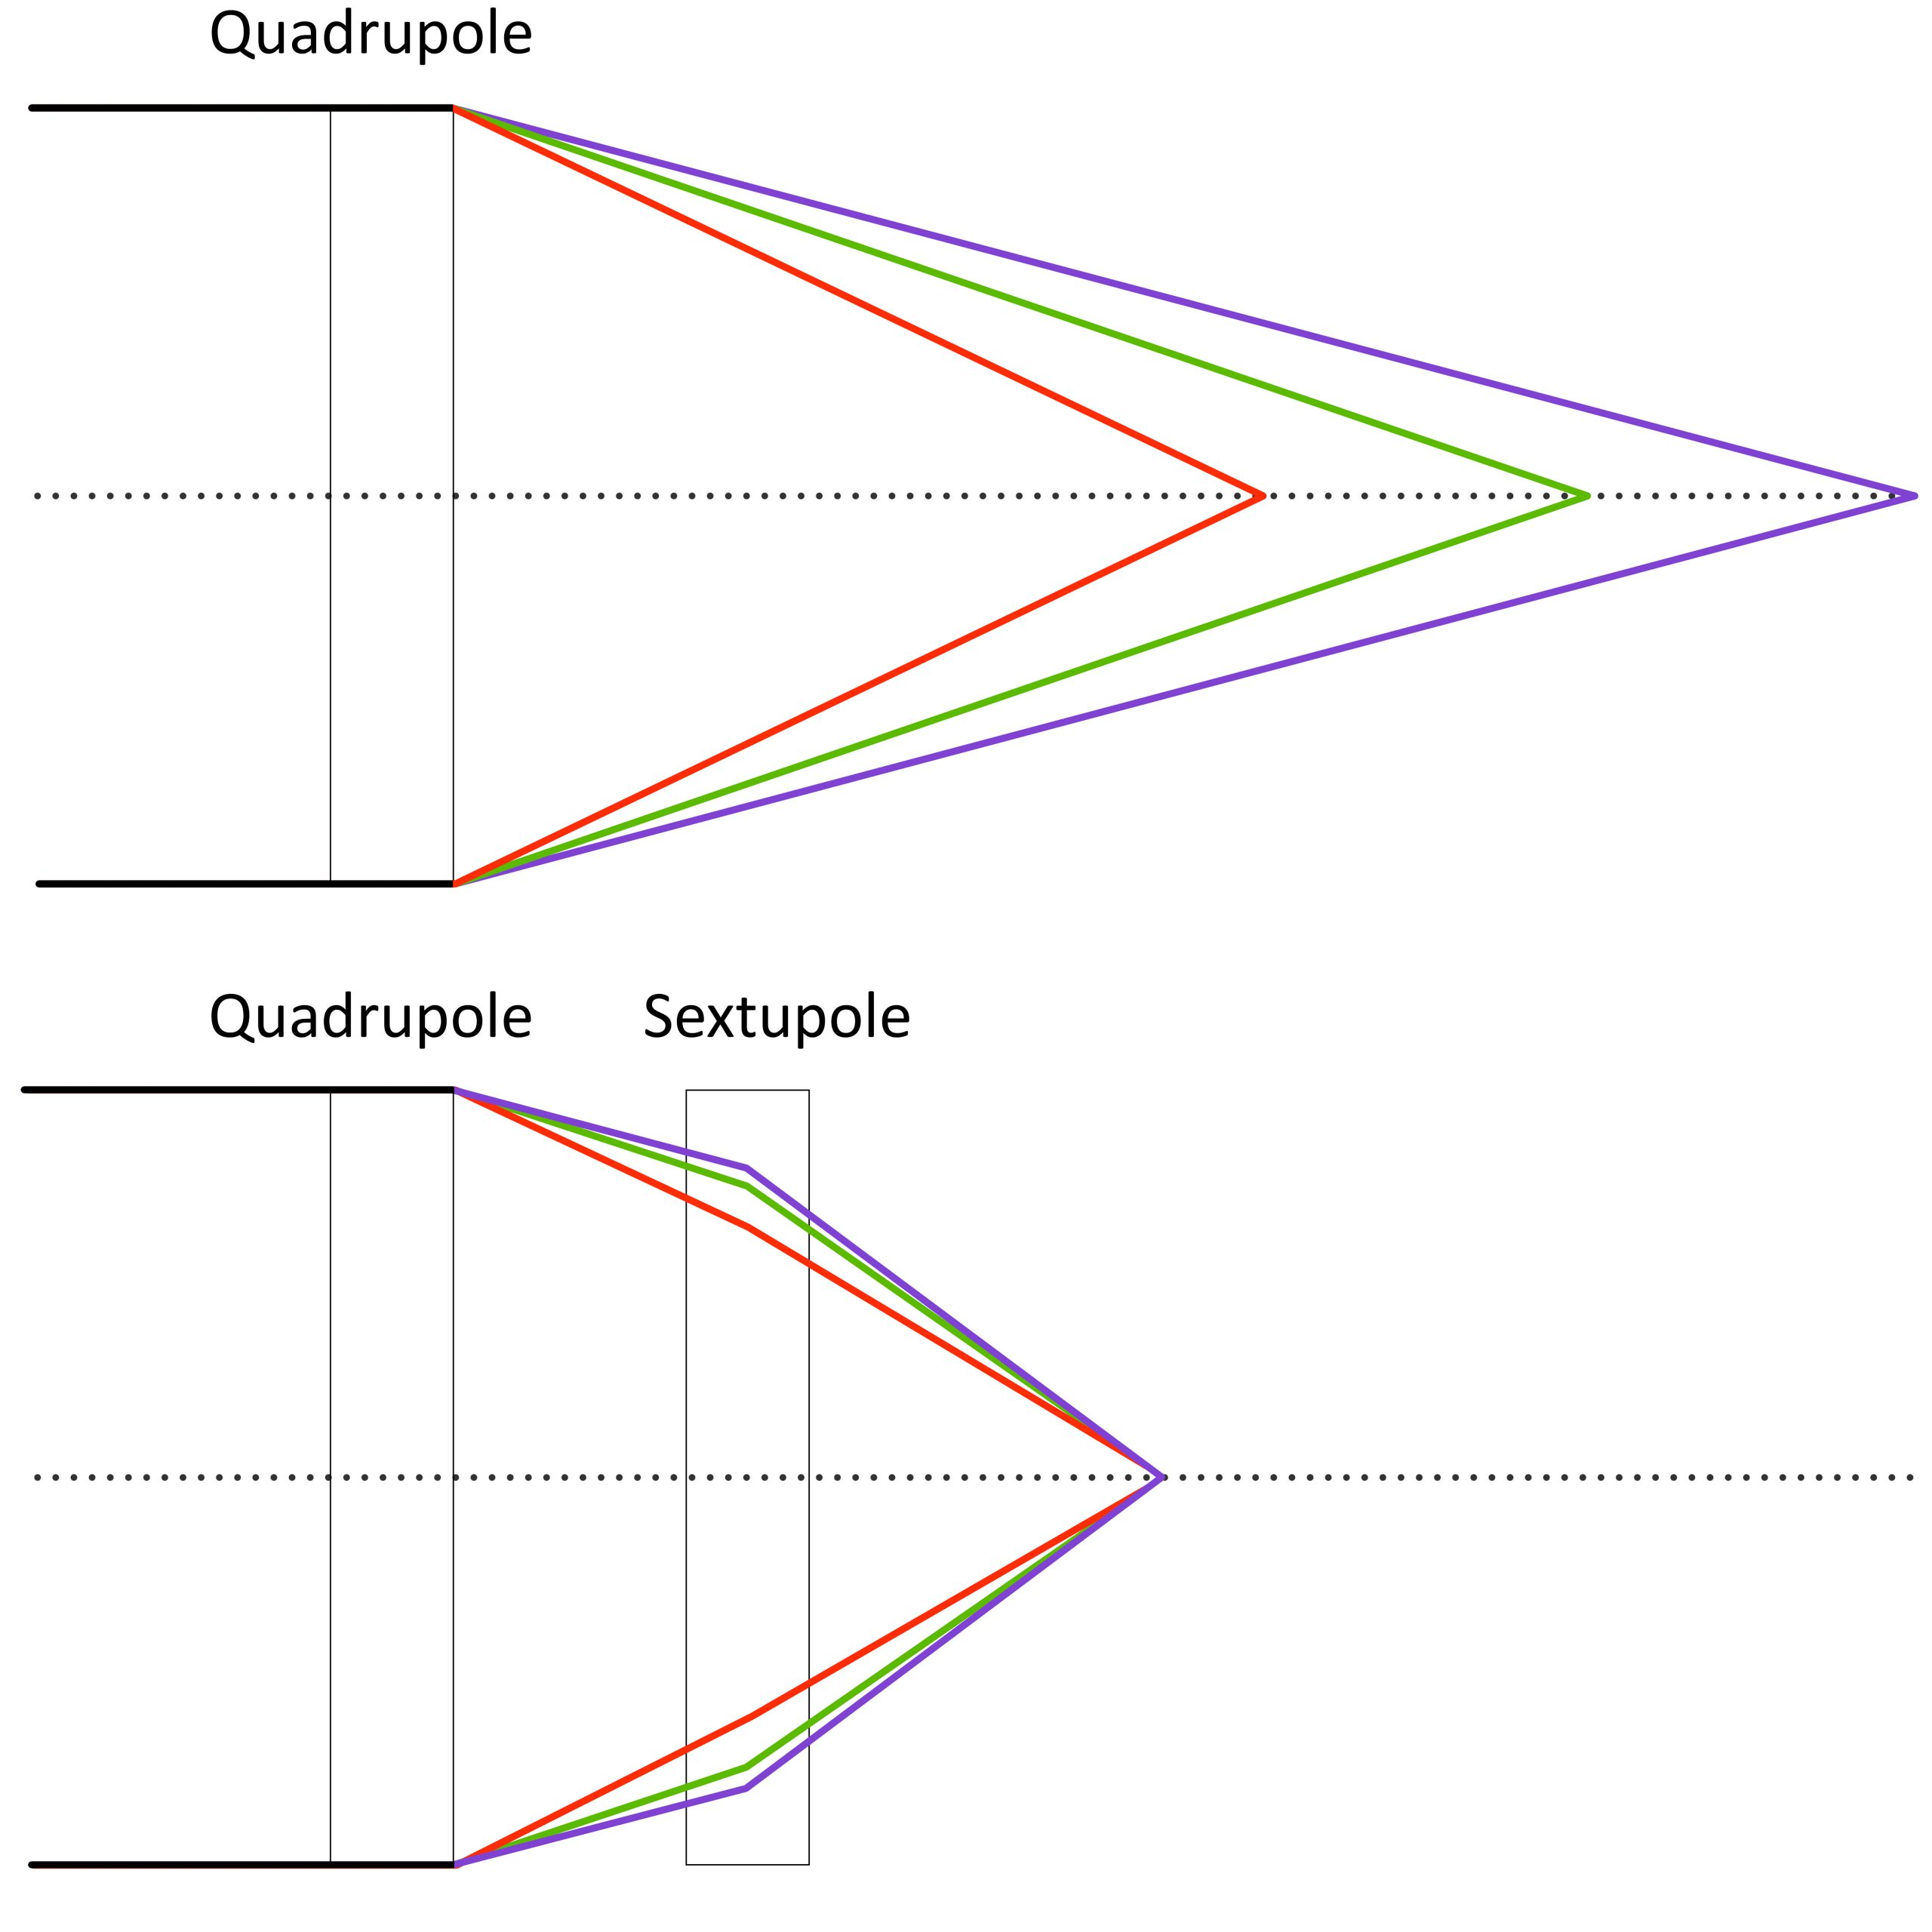
</div>

**Non-linearities**

1. Add 0.5 m long sextupole attached to the two qudrupoles. With a matching block adjust the vertical and horizontal chromaticity of the cell (global parameters: DQ1 and DQ2) to zero, by powering the two sextupoles ($K2_1$ and $K2_1$).

        !In the mgnet definition section:
        SF: SEXTUPOLE, L:=??, K2:=??;
        SD: SEXTUPOLE, L:=??, K2:=??;
        
        !In the sequence:
        S2 : SD, at=??;
        
<div>
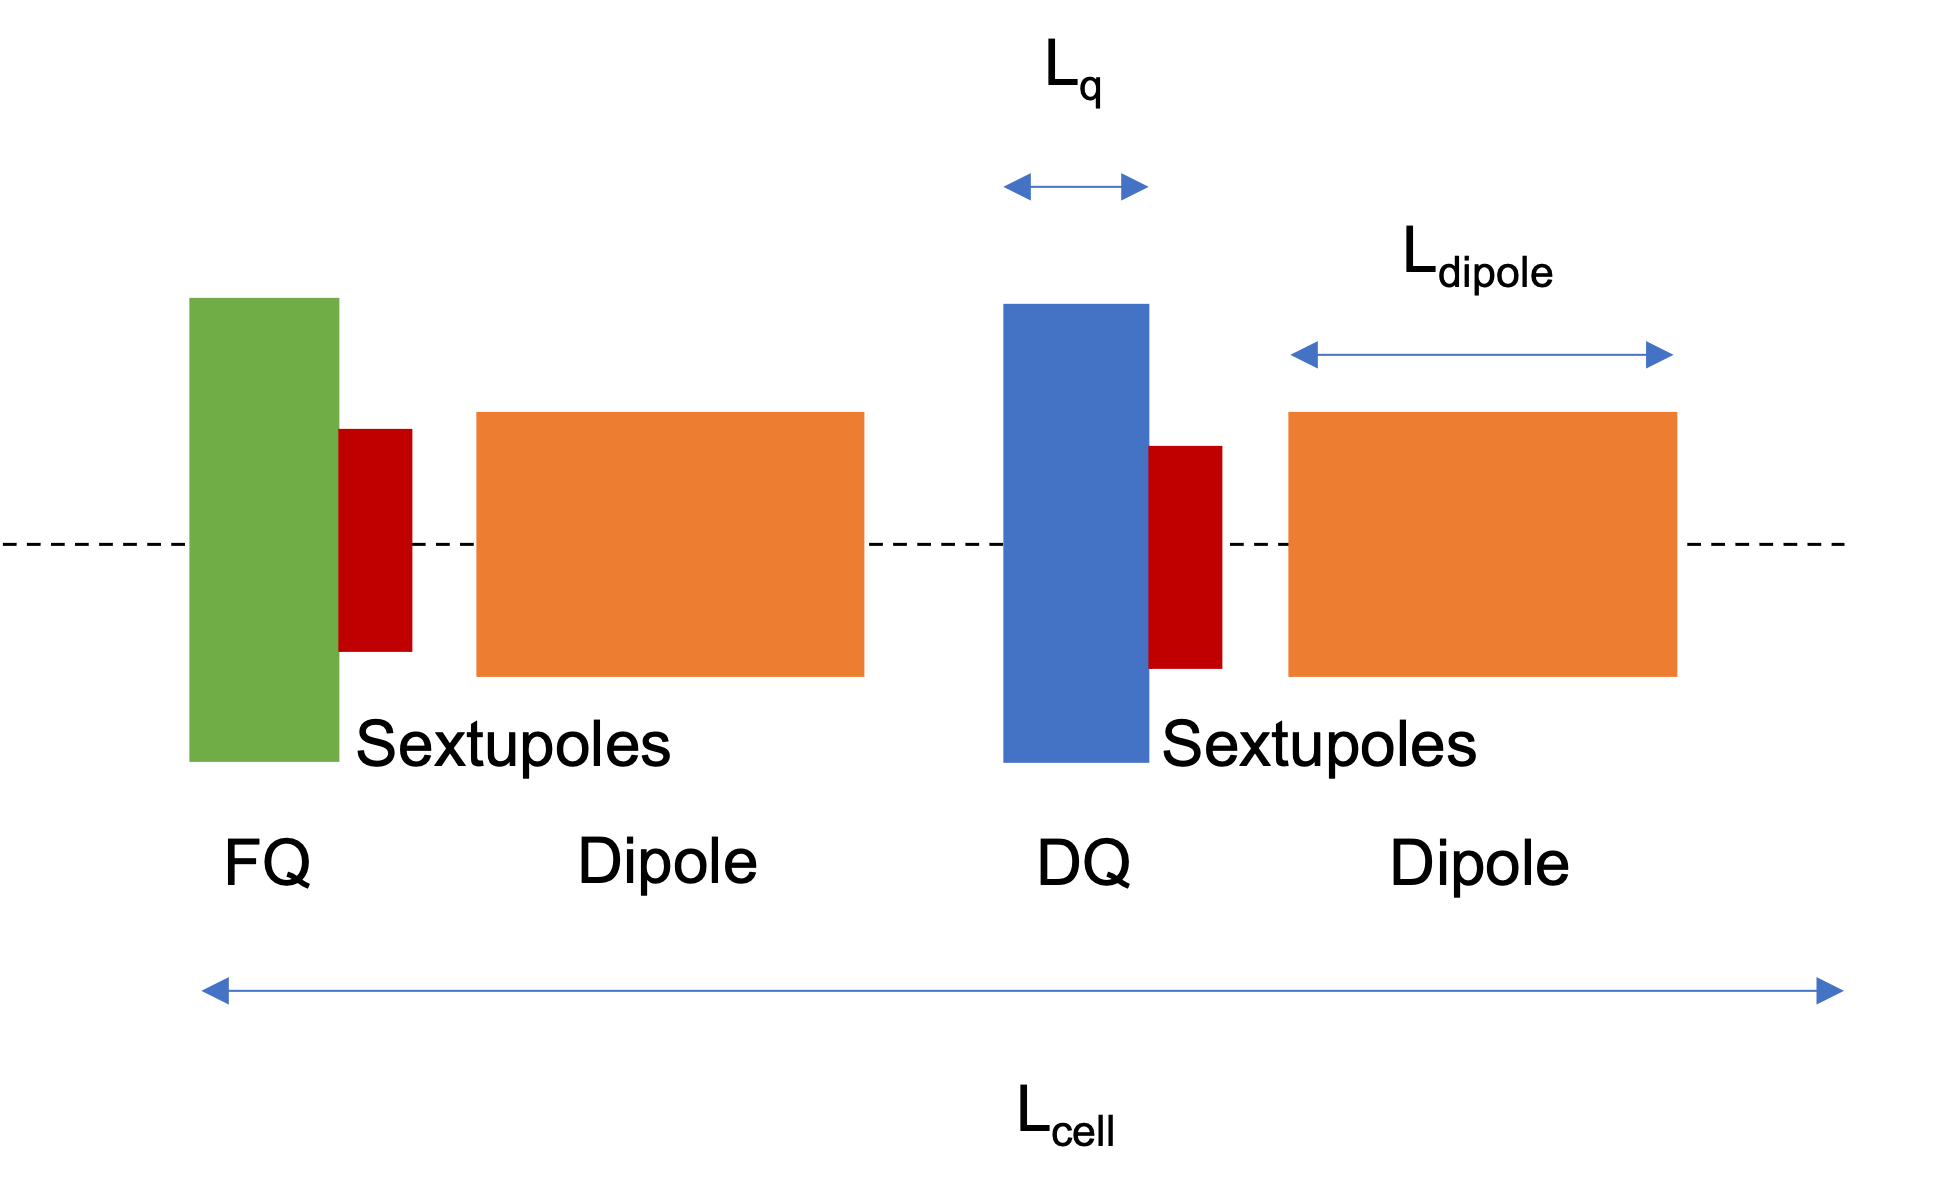
</div>     

2. Using the $K2_1$ and $K2_2$, $\beta$-function and dispersion at the sextupole location, evaluate using the formula the sextupolar effect on the Q1 for a particle at DELTAP=0.01. Compare with the results obtained in the Tutorial 2: Part 1.


3. Track a particle with initial coordinates x,y,px,py = (1,1,0,0) mm in 100 cells and DELTAP=0.01. Plot the x-px phase space. Did you manage to recover the original tune for the off-momentum particle? 
    
**REMEMEBER** to make thin your lattice to use the TRACK command.

        track, dump;    
        start, x=1e-3, px=0, y=1e-3, py=0;    
        run, turns=100;   
        endtrack; 
        
4. Track a particle with initial coordinates x,y,px,py=(100,100,0,0). How does the particle move in the phase space, cell after cell? Do you see the tunes? What is going on?

**BONUS:**

5. Move the tunes to (0.23, 0.23) and repeat the questions 3 and 4. Is now the particle stable?

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from cpymad.madx import Madx 

In [3]:
myMad = Madx(stdout=True)

1. Add 0.5 m long sextupole attached to the two qudrupoles. With a matching block adjust the vertical and horizontal chromaticity of the cell (global parameters: DQ1 and DQ2) to zero, by powering the two sextupoles (𝐾21 and 𝐾21).

In [4]:
#First add the sextupoles to the lattice
myMad = Madx()
myString='''

! *********************************************************************
! Definition of parameters
! *********************************************************************

quadrupoleLength=5;
dipoleLength=15;
cellLength=100;
nBend=736;

myKF=0.0056;
myKD=-0.0056;

! *********************************************************************
! Definition of magnets
! ********************************************************************* 

QF: quadrupole, L=quadrupoleLength, K1:=myKF;
QD: quadrupole, L=quadrupoleLength, K1:=myKD;
BM: sbend, L=dipoleLength, angle=2*pi/nBend; 

! *********************************************************************
! Definition of sequence
! *********************************************************************

!VERY IMPORTANT TO CHANGE THE REFERENCE SYSTEM TO THE CENTER AND CHANGE THE S POSITION
!TO USE THE MAKETHIN COMMAND

myCell:sequence, refer=CENTER, L=cellLength; ! already changed to centre
q1: QF, at=0+2.5;
B1: BM, at =10+7.5;
B2: BM, at =30+7.5;
q2: QD, at=50+2.5;
B3: BM, at =60+7.5;
B4: BM, at =80+7.5;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************

beam, particle=proton, energy=7000;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS BEFORE MATCHING
! *********************************************************************

twiss, table=beforematching, file="BeforeMatching.txt";
!plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="BeforeMatching";

! *********************************************************************
! MATCHING
! *********************************************************************

MATCH, SEQUENCE=myCell;
GLOBAL, Q1=0.25;//H-tune
GLOBAL, Q2=0.25;//V-tune
VARY, NAME= myKF, STEP=0.00001;
VARY, NAME= myKD, STEP=0.00001;
LMDIF, CALLS=50, TOLERANCE=1e-6;//method adopted
ENDMATCH;

! *********************************************************************
! TWISS AFTER MATCHING
! *********************************************************************

twiss, file="AfterMatching.txt";
plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="AfterMatching";

! *********************************************************************
! FINAL TUNE VALUES
! *********************************************************************

value, table(summ,Q1)*(nBend/4);
value, table(summ,Q2)*(nBend/4);

value, table(summ,dQ1);
value, table(summ,dQ2);

!**********
! MAKETHIN
!**********

select, flag=MAKETHIN, SLICE=1;
MAKETHIN, SEQUENCE=myCell;
use, sequence=myCell;

'''
myMad.input(myString);

In [ ]:
# What are the horizontal and vertical natural chromaticities?
thinNonZeroChromaDFTable=myMad.table['summ'].dframe()

In [ ]:
# Now perform the chromaticity matching
myString='''
//*************************************************//
!   MATCHING OF THE CHROMATICITY
//*************************************************//
match, sequence=??;
!!! Variables
vary,name=??,step=0.0001;
vary,name=??,step=0.0001;
!!! Constraints
global, dq1=??; ! Chromaticities set to 0
global, dq2=??;
!!! The next line ask MAD-X to do the matching itself
LMDIF, calls = 100, tolerance=1E-12;
endmatch;


//*************************************************//
!   TWISS
//*************************************************//

SELECT,FLAG=TWISS, column=name,s,betx,bety,dx,K1L,K2L;
twiss,file="Tutorial2_Part2.txt";

'''
myMad.input(myString);

In [ ]:
# What are the horizontal and vertical natural chromaticities?
thinZeroChromaDFTable=myMad.table['summ'].dframe()

# MATCHING AND CORRECTION
2. Using the 𝐾21 and 𝐾21, 𝛽-function and dispersion at the sextupole location, evaluate using the formula the sextupolar effect on the Q1 for a particle at DELTAP=0.01. Compare with the results obtained in the Tutorial 2: Part 1.

Sextupoles are needed for chromaticity correction...but they introduce non-linear fields which induces non-linear motion (resonances, tune shifts, chaotic motion...).

Sextupoles contribution to the chromaticity from the formulas:
$\xi = \frac{1}{4*\pi}*(\beta_{x,S1}*K2_1*Dx_{S1}+\beta_{x,S2}*K2_2*Dx_{S2})$

In [ ]:
# Accessing the TWISS data
thinZeroChromaDFTable=myMad.table['twiss'].dframe()

In [ ]:
thinZeroChromaDFTable[['name','s','betx','dx','k2l']]

In [4]:
# Computatio of the sextupoles contribution to the chromaticity


In [5]:
#dq1 before compensation


# Tracking after chromaticity correction
3. Track a particle with initial coordinates x,y,px,py = (1,1,0,0) mm in 100 cells and DELTAP=0.01. Plot the x-px phase space. Did you manage to recover the original tune for the off-momentum particle? 

In [13]:
myString='''
//*************************************************//
!   TRACKING
//*************************************************//
track,dump,file='withSextupoles', DELTAP=??;
start, x= ??, px=??, y= ??, py=??;
run,turns=100;
endtrack;

'''
myMad.input(myString);

In [14]:
# Saving the data from the tracking in a dataframe
off_momentum_nonlinear_particle_1=myMad.table['track.obs0001.p0001'].dframe()

In [ ]:
%matplotlib notebook
myParticle=off_momentum_nonlinear_particle_1
plt.plot(off_momentum_nonlinear_particle_1['x'],off_momentum_nonlinear_particle_1['px'],'ob',label='X-phase space')
plt.plot(off_momentum_nonlinear_particle_1['y'],off_momentum_nonlinear_particle_1['py'],'.r',label='Y-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.grid()

In [6]:
#Did you recover the tune for on-momentum particles? Why?

4. Track a particle with initial coordinates x,y,px,py=(100,100,0,0). How does the particle move in the phase space, cell after cell? Do you see the tunes? What is going on?

In [ ]:
myString='''
//*************************************************//
!   TRACKING
//*************************************************//
track,dump,file='withSextupoles', DELTAP=??;
start, x= ??, px=??, y= ??, py=??;
run,turns=??;
endtrack;

'''
myMad.input(myString);

In [ ]:
# Saving the data from the tracking in a dataframe
off_momentum_nonlinear_particle_2=myMad.table['track.obs0001.p0001'].dframe()

In [ ]:
%matplotlib notebook
myParticle=off_momentum_nonlinear_particle_2
plt.plot(off_momentum_nonlinear_particle_2['x'],off_momentum_nonlinear_particle_2['px'],'ob',label='X-phase space')
plt.plot(off_momentum_nonlinear_particle_2['y'],off_momentum_nonlinear_particle_2['px'],'.r',label='Y-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.grid()

In [1]:
#Comparison of the two off-momentum particles but with different amplitude

In [ ]:
%matplotlib notebook
plt.plot(off_momentum_nonlinear_particle_1['turn'],off_momentum_nonlinear_particle_1['x'],'.-b', label='Particle 1')
plt.plot(off_momentum_nonlinear_particle_2['turn'],off_momentum_nonlinear_particle_2['x'],'.-r', label='Particle 2' )
plt.xlabel('Turn')
plt.ylabel('[m]');
plt.legend(loc='best');
plt.ylim(-2,2)
plt.grid()

**BONUS**

# Matching the tunes at (0.23,0.23)
5. Move the tunes to (0.23, 0.23) and repeat the previous point. Is now the particle stable?

In [20]:
myString='''
//*************************************************//
!   MATCHING OF THE TUNES
//*************************************************//
use, sequence=JUAS;

match, sequence=JUAS;
!! Variables
vary,name=??,step=0.0001;
vary,name=??,step=0.0001;
!! Constraints
global, Q1=??;
global, Q2=??;
!! The next line ask MAD-X to do the matching itself
LMDIF, calls = 1000, tolerance=1E-12;
endmatch;
'''
myMad.input(myString);

In [21]:
myString='''
//*************************************************//
!   TRACKING
//*************************************************//
track,dump,file='newWP', DELTAP=??;
start, x= ??, px=??, y= ??, py=??;
start, x= ??, px=??, y= ??, py=??;
run,turns=??;
endtrack;
'''
myMad.input(myString);

In [22]:
# Saving the data from the tracking in a dataframe
optWP_off_momentum_nonlinear_particle_1=myMad.table['track.obs0001.p0001'].dframe()
optWP_off_momentum_nonlinear_particle_2=myMad.table['track.obs0001.p0002'].dframe()

In [ ]:
%matplotlib notebook
plt.plot(optWP_off_momentum_nonlinear_particle_2['x'],optWP_off_momentum_nonlinear_particle_2['px'],'ob',label='X-phase space')
plt.plot(optWP_off_momentum_nonlinear_particle_2['y'],optWP_off_momentum_nonlinear_particle_2['px'],'.r',label='Y-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.grid()

In [ ]:
%matplotlib notebook
plt.plot(optWP_off_momentum_nonlinear_particle_1['turn'],optWP_off_momentum_nonlinear_particle_1['x'],'.-b', label='Particle 1')
plt.plot(optWP_off_momentum_nonlinear_particle_2['turn'],optWP_off_momentum_nonlinear_particle_2['x'],'.-r', label='Particle 2' )
plt.xlabel('Turn')
plt.ylabel('[m]');
plt.legend(loc='best');
plt.ylim(-2,2)
plt.grid()

What happened and why?